In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import folium
from folium import plugins

In [2]:
# URL of Denver food stores
url = 'https://www.denvergov.org/media/gis/DataCatalog/food_stores/csv/food_stores.csv'
# Read remote URL and save a copy locally
foodstores_df = pd.read_csv(url)
foodstores_df.to_csv('../data/food-stores.csv')

In [3]:
print(foodstores_df.shape)
foodstores_df.head()

(588, 26)


,STORE_TYPE,STORE_NAME,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,PHONE,HOURS,...,EMPSIZ,FRNCOD,SQFT,SOURCE,POINT_X,POINT_Y,HCSI,NBHD_NAME,COUNCIL_DISTRICT,GLOBALID
0,Dollar Store,Dollar Tree,NaN,5190 Federal Blvd,NaN,Denver,CO,80221.0,(303) 455-3278,NaN,...,10 to 19,NaN,"2,500 - 9,999",InfoGroup2014,-105.024782,39.790432,NaN,Chaffee Park,Council District 1,{00000000-0000-0000-0000-000000000000}
1,Dollar Store,Dollars City,NaN,4855 Pecos St,NaN,Denver,CO,80221.0,(303) 477-4070,NaN,...,1 to 4,NaN,"0 - 2,499",InfoGroup2014,-105.007082,39.784801,NaN,Chaffee Park,Council District 1,{00000000-0000-0000-0000-000000000000}
2,Small Grocery Store,Leever's / Save A Lot,NaN,4860 Pecos St,NaN,Denver,CO,80221.0,(720) 855-6622,NaN,...,1 to 4,NaN,"0 - 2,499",InfoGroup2014,-105.005719,39.784969,NaN,Chaffee Park,Council District 1,{00000000-0000-0000-0000-000000000000}
3,Convenience Store,7-Eleven,NaN,3810 N FEDERAL BLVD,NaN,Denver,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,DEH2014,-105.024892,39.769585,NaN,Sunnyside,Council District 1,{00000000-0000-0000-0000-000000000000}
4,Convenience Store,For Every Day Store,NaN,4595 Pecos St,NaN,Denver,CO,80211.0,(303) 433-1815,NaN,...,1 to 4,NaN,"0 - 2,499",InfoGroup2014,-105.006843,39.779893,NaN,Sunnyside,Council District 1,{00000000-0000-0000-0000-000000000000}


In [4]:
foodstores_df.tail()

,STORE_TYPE,STORE_NAME,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,PHONE,HOURS,...,EMPSIZ,FRNCOD,SQFT,SOURCE,POINT_X,POINT_Y,HCSI,NBHD_NAME,COUNCIL_DISTRICT,GLOBALID
583,Convenience Store,Aztlan,NaN,4880 Chambers Rd,NaN,Denver,CO,80239.0,(303) 307-8869,NaN,...,1 to 4,NaN,"0 - 2,499",InfoGroup2014,-104.809053,39.786122,NaN,Gateway - Green Valley Ranch,Council District 11,{00000000-0000-0000-0000-000000000000}
584,Discount Merchandise Market,Discount Empire Inc,NaN,4854 Chambers Rd,NaN,Denver,CO,80239.0,(303) 371-4131,NaN,...,1 to 4,NaN,"40,000+",InfoGroup2014,-104.809596,39.785291,NaN,Gateway - Green Valley Ranch,Council District 11,{00000000-0000-0000-0000-000000000000}
585,Small Grocery Store,Walmart Neighborhood Market,NaN,5141 Chambers Rd,NaN,Denver,CO,80239.0,(303) 218-6237,NaN,...,50 to 99,NaN,"2,500 - 9,999",InfoGroup2014,-104.809556,39.785584,NaN,Gateway - Green Valley Ranch,Council District 11,{00000000-0000-0000-0000-000000000000}
586,Convenience Store With Gas,Z-Mart,NaN,14125 E 52ND AVE,NaN,Denver,CO,NaN,NaN,NaN,...,NaN,NaN,NaN,DEH2014,-104.824200,39.790605,Healthy Corner Store Initiative,Montbello,Council District 11,{00000000-0000-0000-0000-000000000000}
587,Closed Supermarket,Safeway,NaN,4884 Chambers Rd,NaN,Denver,CO,80239.0,NaN,NaN,...,NaN,NaN,NaN,NaN,-104.808876,39.786134,NaN,Gateway - Green Valley Ranch,Council District 11,{00000000-0000-0000-0000-000000000000}


In [5]:
foodstores_df.columns = map(str.lower, foodstores_df.columns)
foodstores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 26 columns):
store_type          588 non-null object
store_name          588 non-null object
address_id          0 non-null float64
address_line1       588 non-null object
address_line2       0 non-null float64
city                585 non-null object
state               585 non-null object
zip                 271 non-null float64
phone               257 non-null object
hours               0 non-null float64
snap                1 non-null object
sic                 249 non-null float64
naics_ext           249 non-null float64
sales_vol           247 non-null float64
hdbrch              0 non-null float64
number_emp          247 non-null float64
empsiz              247 non-null object
frncod              0 non-null float64
sqft                248 non-null object
source              580 non-null object
point_x             588 non-null float64
point_y             588 non-null float64
hcsi           

In [6]:
foodstores_df.isnull().sum()

store_type            0
store_name            0
address_id          588
address_line1         0
address_line2       588
city                  3
state                 3
zip                 317
phone               331
hours               588
snap                587
sic                 339
naics_ext           339
sales_vol           341
hdbrch              588
number_emp          341
empsiz              341
frncod              588
sqft                340
source                8
point_x               0
point_y               0
hcsi                572
nbhd_name             0
council_district      0
globalid              0
dtype: int64

In [7]:
# Columns with null (np.nan) values
nan_col_list = foodstores_df.columns[foodstores_df.isnull().any()].tolist()
nan_col_list
# Sum of nan values of each column
nulls = foodstores_df[nan_col_list].isnull().sum()
nulls

address_id       588
address_line2    588
city               3
state              3
zip              317
phone            331
hours            588
snap             587
sic              339
naics_ext        339
sales_vol        341
hdbrch           588
number_emp       341
empsiz           341
frncod           588
sqft             340
source             8
hcsi             572
dtype: int64

In [8]:
numeric_columns = foodstores_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['address_id',
 'address_line2',
 'zip',
 'hours',
 'sic',
 'naics_ext',
 'sales_vol',
 'hdbrch',
 'number_emp',
 'frncod',
 'point_x',
 'point_y']

In [9]:
cat_columns = ['store_type', 'nbhd_name', 'council_district', 'sqft', 'zip']
cat_columns

['store_type', 'nbhd_name', 'council_district', 'sqft', 'zip']

In [10]:
# Print how many categorical columns so figure out plot grid
print(len(cat_columns), 'categorical columns')

5 categorical columns


In [11]:
def draw_cat_countplots(df, columns, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20), dpi=80)
    for i, col in enumerate(columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.xticks(rotation=90)
        ax.set_title(col)
        plt.ylabel('No. of Occurences')
    fig.tight_layout()
    plt.savefig('../assets/png/.png')
    plt.show()  

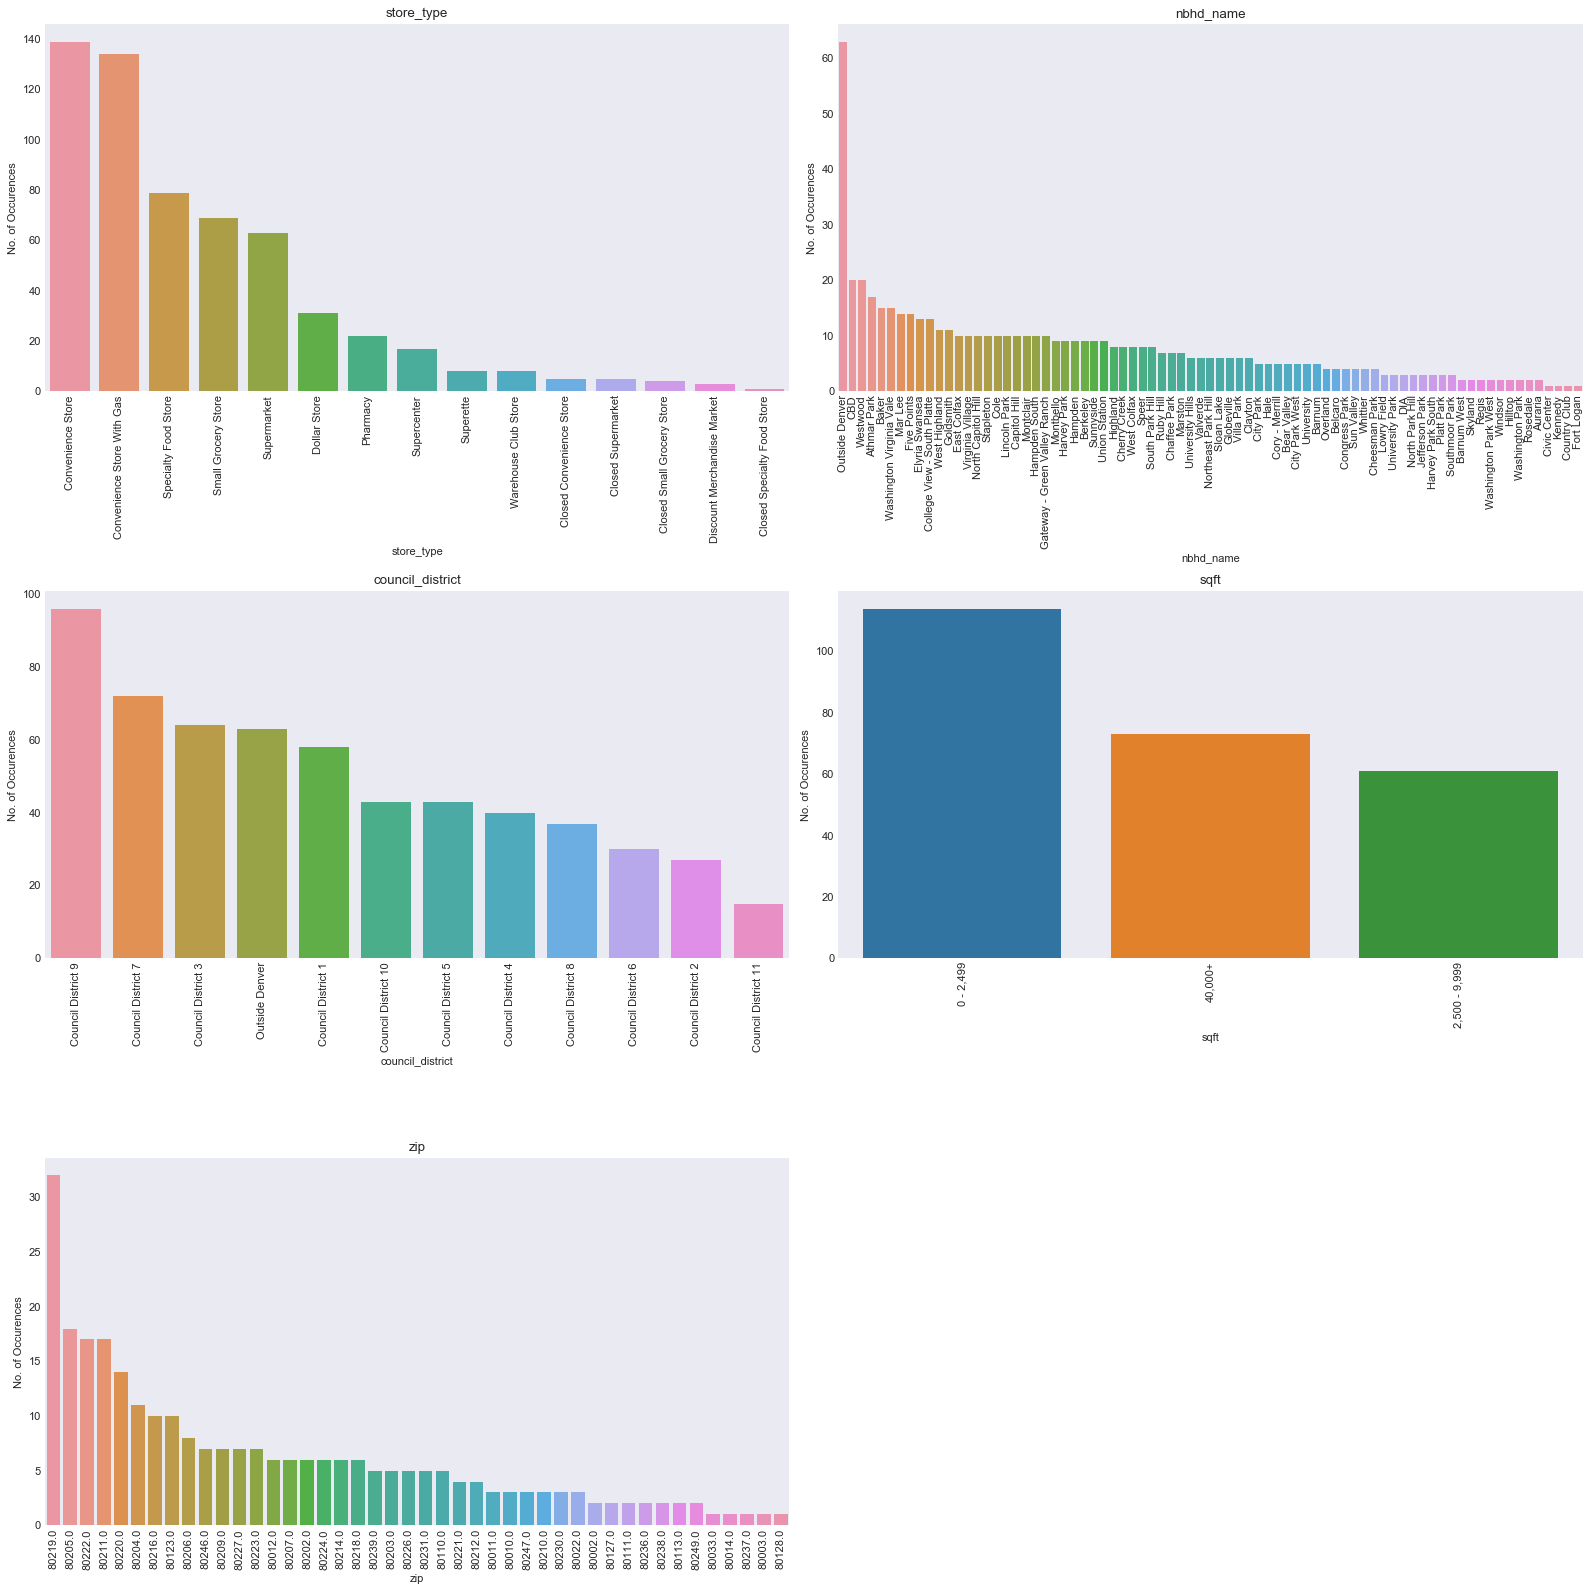

In [12]:
draw_cat_countplots(foodstores_df, cat_columns, int(len(cat_columns)/2)+1, 2)

In [13]:
# Foodstores Heatmap
foodmap_heat = folium.Map(location=[39.7392358, -104.990251],zoom_start=11)
# Convert for heatmap
foodstores = foodstores_df[['point_y', 'point_x']].values.tolist()

# Plot heatmap
foodmap_heat.add_child(folium.plugins.HeatMap(foodstores, radius=25))

foodmap_heat.save('../assets/html/foodmap-z25.html')
#foodmap

In [14]:
foodmap_heat

In [15]:
store_type_list = foodstores_df['store_type'].unique()
store_type_list

array(['Dollar Store', 'Small Grocery Store', 'Convenience Store',
       'Convenience Store With Gas', 'Specialty Food Store',
       'Closed Specialty Food Store', 'Supermarket', 'Pharmacy',
       'Closed Small Grocery Store', 'Superette',
       'Closed Convenience Store', 'Discount Merchandise Market',
       'Supercenter', 'Warehouse Club Store', 'Closed Supermarket'], dtype=object)

In [20]:
# Circle map.
map_circle = folium.Map(location=[39.7392358, -104.990251], zoom_start=11)

for desc, x, y in foodstores_df[['store_type', 'point_x', 'point_y']].values:
    if desc == 'Dollar Store':
        folium.CircleMarker(location=[y, x],
                            color='green',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Small Grocery Store':
        folium.CircleMarker(location=[y, x],
                            color='orange',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Convenience Store':
        folium.CircleMarker(location=[y, x],
                            color='purple',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Convenience Store With Gas':
        folium.CircleMarker(location=[y, x],
                            color='red',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Specialty Food Store':
        folium.CircleMarker(location=[y, x],
                            color='blue',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Supermarket':
        folium.CircleMarker(location=[y, x],
                            color='maroon',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Pharmacy':
        folium.CircleMarker(location=[y, x],
                            color='white',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Supercenter':
        folium.CircleMarker(location=[y, x],
                            color='yellow',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)
    elif desc == 'Closed Specialty Food Store' or 'Closed Small Grocery Store' or 'Closed Convenience Store' or 'Closed Supermarket':
        folium.CircleMarker(location=[y, x],
                            color='black',
                            radius=5,
                            popup=desc,
                            opacity=0.8,
                            fill=True).add_to(map_circle)        
        
map_circle.save('../assets/html/foodstores_circle.html')

In [21]:
map_circle